In [1]:
!wget -O transfusion.csv https://www.dropbox.com/s/v49bxpf5m0p10wc/transfusion.csv?dl=0

--2021-05-22 06:02:46--  https://www.dropbox.com/s/v49bxpf5m0p10wc/transfusion.csv?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/v49bxpf5m0p10wc/transfusion.csv [following]
--2021-05-22 06:02:46--  https://www.dropbox.com/s/raw/v49bxpf5m0p10wc/transfusion.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucc67c0588ddac13123c0bcd50a8.dl.dropboxusercontent.com/cd/0/inline/BO8h5YTqxDOh6Hj1gwok4QKDcpXNpZmZ6fVmgy1kq74I1XDZ_4UPj4RtDe_e_y0yVfKvY-cj7Cf-Btkl4CB_umwibQTAAyxXrAamwtjaRK1hFAc--9FFAPDsKh4Q3pMRSnYO-xmMP7fi9IPmaygSWVUU/file# [following]
--2021-05-22 06:02:47--  https://ucc67c0588ddac13123c0bcd50a8.dl.dropboxusercontent.com/cd/0/inline/BO8h5YTqxDOh6Hj1gwok4QKDcpXNpZmZ6fVmgy1kq74I1XDZ_4UPj4RtDe_e_y0yVfKvY-cj7Cf-

In [21]:

!head -n10 transfusion.csv

Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),"whether he/she donated blood in March 2007"
2 ,50,12500,98 ,1
0 ,13,3250,28 ,1
1 ,16,4000,35 ,1
2 ,20,5000,45 ,1
1 ,24,6000,77 ,0
4 ,4,1000,4 ,0
2 ,7,1750,14 ,1
1 ,12,3000,35 ,0
2 ,9,2250,22 ,1


In [22]:
!tail -n10 transfusion.csv

23 ,1,250,23 ,0
23 ,4,1000,52 ,0
23 ,1,250,23 ,0
23 ,7,1750,88 ,0
16 ,3,750,86 ,0
23 ,2,500,38 ,0
21 ,2,500,52 ,0
23 ,3,750,62 ,0
39 ,1,250,39 ,0
72 ,1,250,72 ,0

In [3]:
# Import pandas
import pandas as pd

# Read in dataset
transfusion = pd.read_csv('transfusion.csv')

# Print out the first rows of our dataset
transfusion.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [4]:
# Inspect the DataFrame's structure.

# Print a concise summary of the transfusion DataFrame with the info() method.
# DataFrame's info() method prints some useful information about a DataFrame:

# index type
# column types
# non-null values
# memory usageincluding the index dtype and column dtypes, non-null values and memory usage.




transfusion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column                                      Non-Null Count  Dtype
---  ------                                      --------------  -----
 0   Recency (months)                            748 non-null    int64
 1   Frequency (times)                           748 non-null    int64
 2   Monetary (c.c. blood)                       748 non-null    int64
 3   Time (months)                               748 non-null    int64
 4   whether he/she donated blood in March 2007  748 non-null    int64
dtypes: int64(5)
memory usage: 29.3 KB


In [ ]:
#rename a dataframe 

In [5]:
# Rename target column as 'target' for brevity
transfusion.rename(
    columns={'whether he/she donated blood in March 2007': 'target'},
    inplace=True
)

# Print out the first 2 rows
transfusion.head(2)

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),target
0,2,50,12500,98,1
1,0,13,3250,28,1


#Teach the two types of method chaining 

In [9]:
transfusion.target.unique()

array([1, 0])

In [10]:
transfusion['target'].unique()

array([1, 0])

In [6]:
# Print target incidence proportions, rounding output to 3 decimal places
transfusion.target.value_counts(normalize=True).round(3)

0    0.762
1    0.238
Name: target, dtype: float64

What’s most important to understand is that you usually need unbiased evaluation to properly use these measures, assess the predictive performance of your model, and validate the model.

This means that you can’t evaluate the predictive performance of a model with the same data you used for training. You need evaluate the model with fresh data that hasn’t been seen by the model before. You can accomplish that by splitting your dataset before you use it.

Training, Validation, and Test Sets
Splitting your dataset is essential for an unbiased evaluation of prediction performance. In most cases, it’s enough to split your dataset randomly into three subsets:

The training set is applied to train, or fit, your model. For example, you use the training set to find the optimal weights, or coefficients, for linear regression, logistic regression, or neural networks.

The validation set is used for unbiased model evaluation during hyperparameter tuning. For example, when you want to find the optimal number of neurons in a neural network or the best kernel for a support vector machine, you experiment with different values. For each considered setting of hyperparameters, you fit the model with the training set and assess its performance with the validation set.

The test set is needed for an unbiased evaluation of the final model. You shouldn’t use it for fitting or validation.

In less complex cases, when you don’t have to tune hyperparameters, it’s okay to work with only the training and test sets.

Underfitting and Overfitting
Splitting a dataset might also be important for detecting if your model suffers from one of two very common problems, called underfitting and overfitting:

Underfitting is usually the consequence of a model being unable to encapsulate the relations among data. For example, this can happen when trying to represent nonlinear relations with a linear model. Underfitted models will likely have poor performance with both training and test sets.

Overfitting usually takes place when a model has an excessively complex structure and learns both the existing relations among data and noise. Such models often have bad generalization capabilities. Although they work well with training data, they usually yield poor performance with unseen (test) data.

You can find a more detailed explanation of underfitting and overfitting

arrays is the sequence of lists, NumPy arrays, pandas DataFrames, or similar array-like objects that hold the data you want to split. All these objects together make up the dataset and must be of the same length.

In supervised machine learning applications, you’ll typically work with two such sequences:

A two-dimensional array with the inputs (x)
A one-dimensional array with the outputs (y)

options are the optional keyword arguments that you can use to get desired behavior:

train_size is the number that defines the size of the training set. If you provide a float, then it must be between 0.0 and 1.0 and will define the share of the dataset used for testing. If you provide an int, then it will represent the total number of the training samples. The default value is None.

test_size is the number that defines the size of the test set. It’s very similar to train_size. You should provide either train_size or test_size. If neither is given, then the default share of the dataset that will be used for testing is 0.25, or 25 percent.

random_state is the object that controls randomization during splitting. It can be either an int or an instance of RandomState. The default value is None.

shuffle is the Boolean object (True by default) that determines whether to shuffle the dataset before applying the split.

stratify is an array-like object that, if not None, determines how to use a stratified split.

In [7]:
# # Target incidence informed us that in our dataset 0s appear 76% of the time. We want to keep the same structure in train and test datasets, i.e., both datasets must have 0 target incidence of 76%. 
# This is very easy to do using the train_test_split() method from the scikit learn library - all we need to do is specify the stratify parameter. In our case, we'll stratify on the target column.


# Import train_test_split method
from sklearn.model_selection import train_test_split

# Split transfusion DataFrame into
# X_train, X_test, y_train and y_test datasets,
# stratifying on the `target` column
X_train, X_test, y_train, y_test = train_test_split(
    transfusion.drop(columns='target'),
    transfusion.target,
    test_size=0.25,
    random_state=42,
    stratify=transfusion.target
)

# Print out the first 2 rows of X_train
X_train.head(2)

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months)
334,16,2,500,16
99,5,7,1750,26


In [8]:
X_test.head(2)

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months)
41,2,5,1250,16
682,11,2,500,25


In [24]:
y_test.head(2)

41     0
682    0
Name: target, dtype: int64

In [25]:
y_train.head(2)

334    0
99     1
Name: target, dtype: int64

In [ ]:
#  Tree-Based Pipeline Optimization Tool (TPOT) 
#TPOT is a Python Automated Machine Learning tool that optimizes machine learning pipelines using genetic programming.

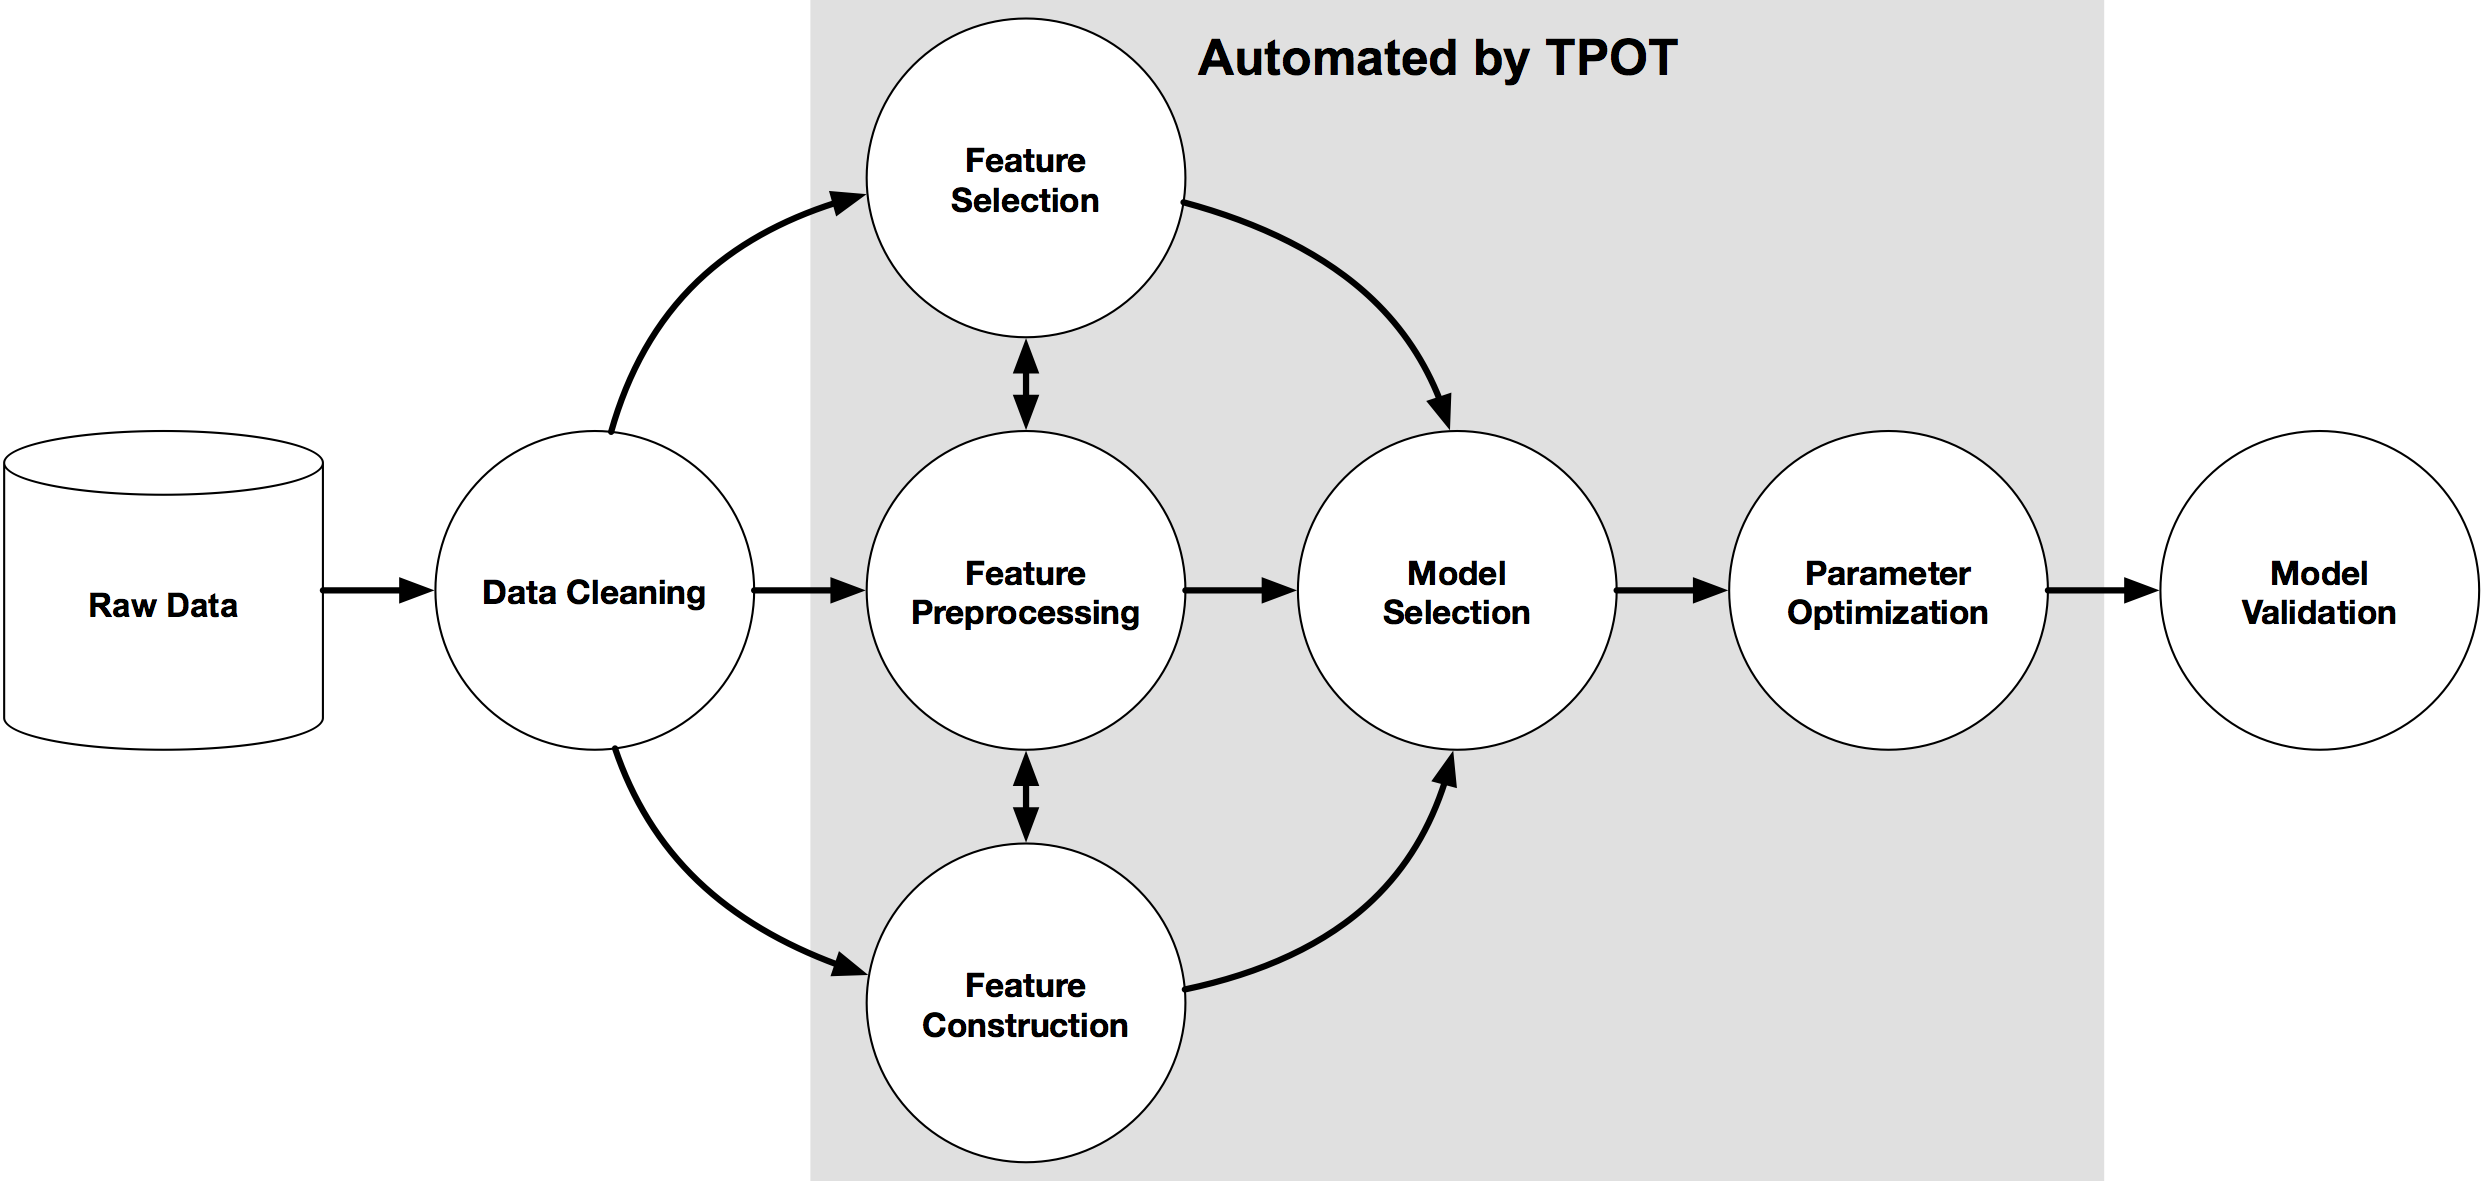

In [ ]:
#TPOT is a python Automated Machine Learning tool that optimizes machine learning pipelines using genetic programming. It will automate the most tedious part of machine learning by intelligently exploring thousands of possible pipelines to find the best one for your data.

In [ ]:
# You will adapt the classification example from the TPOT's documentation. In particular, you will specify scoring='roc_auc' because this is the metric that 
#you want to optimize for and add random_state=42 for reproducibility. You'll also use TPOT light configuration with only fast models and preprocessors.
# The nice thing about TPOT is that it has the same API as scikit-learn, i.e., you first instantiate a model and then you train it, using the fit method.
# Data pre-processing affects the model's performance, and tpot's fitted_pipeline_ attribute will allow you to see what pre-processing (if any) was done in the best pipeline.

In [12]:
!pip install tpot

     |████████████████████████████████| 92kB 3.1MB/s 
     |████████████████████████████████| 163kB 15.7MB/s 
     |████████████████████████████████| 166.7MB 79kB/s 
  Created wheel for stopit: filename=stopit-1.1.2-cp37-none-any.whl size=11954 sha256=8c040d01b219535b6f6e220498ccbb338fb713e68eaabcea60e8a3de71d3d0d1
  Stored in directory: /root/.cache/pip/wheels/3c/85/2b/2580190404636bfc63e8de3dff629c03bb795021e1983a6cc7
Successfully built stopit
  Found existing installation: xgboost 0.90
    Uninstalling xgboost-0.90:
      Successfully uninstalled xgboost-0.90


https://www.datacamp.com/community/tutorials/tpot-machine-learning-python

In [13]:
from tpot import TPOTClassifier
from sklearn.metrics import roc_auc_score

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
# Use the TPOT library to find the best machine learning pipeline.

# Import TPOTClassifier from tpot and roc_auc_score from sklearn.metrics.
# Create an instance of TPOTClassifier and assign it to tpot variable.
# Print tpot_auc_score, rounding it to 4 decimal places.
# Print idx and transform in the for-loop to display the pipeline steps.
# You will adapt the classification example from the TPOT's documentation. In particular, you will specify scoring='roc_auc' because this is the metric that
# you want to optimize for and add random_state=42 for reproducibility. You'll also use TPOT light configuration with only fast models and preprocessors.

# The nice thing about TPOT is that it has the same API as scikit-learn, i.e., you first instantiate a model and then you train it, using the fit method.

# Data pre-processing affects the model's performance, and tpot's fitted_pipeline_ attribute will allow you to see what pre-processing (if any) was done in the best pipeline.

TPOT will automatically explore hundreds of possible pipelines to find the best one for our dataset. Note, the outcome of this search will be a scikit-learn pipeline, meaning it will include any pre-processing steps as well as the model.

We are using TPOT to help us zero in on one model that we can then explore and optimize further.

In [ ]:
#meaning of the parameters 
#population size = Number of individuals to retain in the genetic programming population every generation. The default is 100.
#verbosity = states how much information TPOT communicates while it's running.
#scroing  = Function used to evaluate the quality of a given pipeline for the classification problem like accuracy, average_precision, roc_auc, recall, etc. The default is accuracy.
#random state = The seed of the pseudo-random number generator used in TPOT. Use this parameter to make sure that TPOT will give you the same results each time you run it against the same data set with that seed.
#config_dict = version of method 
#check other methods independantly before submitting 

In [14]:
tpot = TPOTClassifier(
    generations=5,
    population_size=20,
    verbosity=2,
    scoring='roc_auc',
    random_state=42,
    disable_update_check=True,
    config_dict='TPOT light'
)

In [15]:
tpot.fit(X_train, y_train)

# AUC score for tpot model
tpot_auc_score = roc_auc_score(y_test, tpot.predict_proba(X_test)[:, 1])
print(f'\nAUC score: {tpot_auc_score:.4f}')

# Print best pipeline steps
print('\nBest pipeline steps:', end='\n')
for idx, (name, transform) in enumerate(tpot.fitted_pipeline_.steps, start=1):
    # Print idx and transform
    print(f'{idx}. {transform}')


Generation 1 - Current best internal CV score: 0.7422459184429089

Generation 2 - Current best internal CV score: 0.7422459184429089

Generation 3 - Current best internal CV score: 0.7422459184429089

Generation 4 - Current best internal CV score: 0.7422459184429089

Generation 5 - Current best internal CV score: 0.7456308339276876

Best pipeline: MultinomialNB(Normalizer(input_matrix, norm=l2), alpha=0.001, fit_prior=True)

AUC score: 0.7637

Best pipeline steps:
1. Normalizer(copy=True, norm='l2')
2. MultinomialNB(alpha=0.001, class_prior=None, fit_prior=True)


In [16]:
# TPOT picked LogisticRegression as the best model for our dataset with no pre-processing steps, giving us the AUC score of 0.7850. This is a great starting point. Let's see if we can make it better.
# One of the assumptions for linear models is that the data and the features we are giving it are related in a linear fashion, or can be measured with a linear distance metric. 
#If a feature in our dataset has a high variance that's orders of magnitude greater than the other features, this could impact the model's ability to learn from other features in the dataset.
# Correcting for high variance is called normalization. It is one of the possible transformations you do before training a model. Let's check the variance to see if such transformation is needed.

# X_train's variance, rounding the output to 3 decimal places
X_train.var().round(3)

Recency (months)              66.929
Frequency (times)             33.830
Monetary (c.c. blood)    2114363.700
Time (months)                611.147
dtype: float64

In [17]:
# Import numpy
import numpy as np

# Copy X_train and X_test into X_train_normed and X_test_normed
X_train_normed, X_test_normed = X_train.copy(), X_test.copy()

# Specify which column to normalize
col_to_normalize = 'Monetary (c.c. blood)'

# Log normalization
for df_ in [X_train_normed, X_test_normed]:
    # Add log normalized column
    df_['monetary_log'] = np.log(df_[col_to_normalize])
    # Drop the original column
    df_.drop(columns=col_to_normalize, inplace=True)

# Check the variance
X_train_normed.var().round(3)

Recency (months)      66.929
Frequency (times)     33.830
Time (months)        611.147
monetary_log           0.837
dtype: float64

In [ ]:
# Train the logistic regression model.

# Import linear_model from sklearn.
# Create an instance of linear_model.LogisticRegression and assign it to logreg variable.
# Train logreg model using the fit() method.
# Print logreg_auc_score.
# The scikit-learn library has a consistent API when it comes to fitting a model:

# Create an instance of a model you want to train.
# Train it on your train datasets using the fit method.
# You may recognise this pattern from when you trained TPOT model. This is the beauty of the scikit-learn library: you can quickly try out different models with only a few code changes.

In [18]:
# Importing modules
from sklearn import linear_model

# Instantiate LogisticRegression
logreg = linear_model.LogisticRegression(
    solver='liblinear',
    random_state=42
)

# Train the model
logreg.fit(X_train_normed, y_train)

# AUC score for tpot model
logreg_auc_score = roc_auc_score(y_test, logreg.predict_proba(X_test_normed)[:, 1])
print(f'\nAUC score: {logreg_auc_score:.4f}')


AUC score: 0.7890


In [ ]:
# Sort your models based on their AUC score from highest to lowest.

# Import itemgetter from operator module.
# Sort the list of (model_name, model_score) pairs from highest to lowest using reverse=True parameter.

In [19]:
# Importing itemgetter
from operator import itemgetter

# Sort models based on their AUC score from highest to lowest
sorted(
    [('tpot', tpot_auc_score), ('logreg', logreg_auc_score)],
    key=itemgetter(1),
    reverse=True
)

[('logreg', 0.7890178003814368), ('tpot', 0.7637476160203432)]